# Unsupervised ML (Clustering)

## Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')

# 4.1  Create 3 clusters as below.
1. Sensitive Area's

2. Moderate Area's

3. Peaceful Area's"

In [14]:
df=pd.read_csv(r"C:\Nimish\Flip Robo\01_District_wise_crimes_committed_IPC_2001_2012.csv")
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

From above we can see that there are no null values present as there are 9017 rows and every column has 9017 non null values

In [9]:
df.duplicated().sum()

0

As we can see there are no duplicated values

In [15]:
df.drop(df[df['DISTRICT'] == 'TOTAL'].index, inplace=True)
df.drop(df[df['DISTRICT'] == 'DELHI UT TOTAL'].index, inplace=True)

As we have worked on this dataset before we know that there were Total values in district column which shows sum total of every district for each state so we will remove those as we dont want to cluster them

## Grouping the dataset according to the states/UT

In [16]:
df1 = df.groupby(['STATE/UT']).sum()
df1 = df1.drop(['index','YEAR'], axis=1)
df1= df1.reset_index()
df1

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A & N ISLANDS,160,65,21,109,0,109,94,77,17,...,98,1105,6,214,43,121,0,42,4443,9102
1,ANDHRA PRADESH,31756,22420,1763,13479,2,13477,21239,14936,6303,...,11968,546565,6215,51999,36131,119007,17,138435,482252,2018981
2,ARUNACHAL PRADESH,841,417,36,500,0,500,857,558,299,...,250,5157,2,784,18,167,0,745,7396,27652
3,ASSAM,15432,5662,718,16178,5,16173,27939,22920,5019,...,7918,69183,1276,13620,112,39388,8,30205,181354,597764
4,BIHAR,41245,40919,3672,13124,2,13122,37220,19389,17831,...,8509,189266,13548,7576,226,25680,440,44442,538591,1346293
5,CHANDIGARH,243,301,79,281,0,281,640,534,106,...,62,816,42,314,143,807,0,98,11605,40807
6,CHHATTISGARH,12060,7910,348,11838,0,11838,3345,2630,715,...,3147,85026,1142,19165,1725,9573,5,25432,245855,561027
7,D & N HAVELI,108,31,3,56,0,56,141,94,47,...,55,318,1,50,4,38,0,148,1859,4651
8,DAMAN & DIU,68,38,2,20,0,20,31,15,16,...,34,190,3,15,2,35,0,311,661,2948
9,DELHI UT,6205,5277,883,6424,0,6424,25083,15650,9433,...,564,22210,1582,7534,1687,15211,1,7503,237457,633174


Now we have all the States/UT with their sum of total crimes present under the column Total IPC crimes. We will use this dataset to create the clusters as needed.

### Standardising the data for clustering

In [17]:
x=df1.drop(columns='STATE/UT')
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
xscaled=scalar.fit_transform(x)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(2)
x1 = pca.fit_transform(x)

In [20]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=65)

y = model.fit_predict(x1) 
y

array([0, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 2, 0, 2, 1, 0, 1, 0, 1, 0, 2])

In [21]:
from sklearn.metrics import silhouette_score
silhouette_score(x,y)

0.6672631992248999

We have a silhouette score of 67%

In [22]:
df1['sensitivity'] = model.labels_
df1

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,sensitivity
0,A & N ISLANDS,160,65,21,109,0,109,94,77,17,...,1105,6,214,43,121,0,42,4443,9102,0
1,ANDHRA PRADESH,31756,22420,1763,13479,2,13477,21239,14936,6303,...,546565,6215,51999,36131,119007,17,138435,482252,2018981,1
2,ARUNACHAL PRADESH,841,417,36,500,0,500,857,558,299,...,5157,2,784,18,167,0,745,7396,27652,0
3,ASSAM,15432,5662,718,16178,5,16173,27939,22920,5019,...,69183,1276,13620,112,39388,8,30205,181354,597764,2
4,BIHAR,41245,40919,3672,13124,2,13122,37220,19389,17831,...,189266,13548,7576,226,25680,440,44442,538591,1346293,1
5,CHANDIGARH,243,301,79,281,0,281,640,534,106,...,816,42,314,143,807,0,98,11605,40807,0
6,CHHATTISGARH,12060,7910,348,11838,0,11838,3345,2630,715,...,85026,1142,19165,1725,9573,5,25432,245855,561027,2
7,D & N HAVELI,108,31,3,56,0,56,141,94,47,...,318,1,50,4,38,0,148,1859,4651,0
8,DAMAN & DIU,68,38,2,20,0,20,31,15,16,...,190,3,15,2,35,0,311,661,2948,0
9,DELHI UT,6205,5277,883,6424,0,6424,25083,15650,9433,...,22210,1582,7534,1687,15211,1,7503,237457,633174,2


We have added the column sensitivity to tell which state comes in which sensitivity area. And from careful analysis we have came to the conclusion that peaceful states are with 0 sesitivity, moderate states with 2 and sensitive states as 1

# 4.2) Create DataFrame for each cluster that shows data according to the areas. 

In [34]:
peaceful_states = df1[df1['sensitivity'] == 0]
sensitive_states = df1[df1['sensitivity'] == 1]
moderate_states =df1[df1['sensitivity'] == 2]

In [50]:
peaceful_states

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,sensitivity
0,A & N ISLANDS,160,65,21,109,0,109,94,77,17,...,1105,6,214,43,121,0,42,4443,9102,0
2,ARUNACHAL PRADESH,841,417,36,500,0,500,857,558,299,...,5157,2,784,18,167,0,745,7396,27652,0
5,CHANDIGARH,243,301,79,281,0,281,640,534,106,...,816,42,314,143,807,0,98,11605,40807,0
7,D & N HAVELI,108,31,3,56,0,56,141,94,47,...,318,1,50,4,38,0,148,1859,4651,0
8,DAMAN & DIU,68,38,2,20,0,20,31,15,16,...,190,3,15,2,35,0,311,661,2948,0
10,GOA,487,269,67,350,0,350,236,164,72,...,2287,19,328,123,191,0,2664,9948,32051,0
13,HIMACHAL PRADESH,1454,835,130,1804,0,1804,1798,1541,257,...,15909,55,3597,439,3245,0,6309,87178,154948,0
14,JAMMU & KASHMIR,6304,10303,347,2810,0,2810,9665,8820,845,...,3883,135,11509,3993,1800,0,4524,132921,259155,0
18,LAKSHADWEEP,3,6,0,7,0,7,1,1,0,...,57,0,5,0,7,0,0,327,743,0
21,MANIPUR,1955,3536,42,387,0,387,1811,1057,754,...,3433,2,504,3,219,0,87,12737,35072,0


In [51]:
moderate_states

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,sensitivity
3,ASSAM,15432,5662,718,16178,5,16173,27939,22920,5019,...,69183,1276,13620,112,39388,8,30205,181354,597764,2
6,CHHATTISGARH,12060,7910,348,11838,0,11838,3345,2630,715,...,85026,1142,19165,1725,9573,5,25432,245855,561027,2
9,DELHI UT,6205,5277,883,6424,0,6424,25083,15650,9433,...,22210,1582,7534,1687,15211,1,7503,237457,633174,2
12,HARYANA,10471,7434,857,6410,1,6409,8656,6129,2527,...,51254,3130,5323,8188,27112,0,15197,224844,595303,2
15,JHARKHAND,19060,12270,1231,9159,5,9154,8476,5282,3194,...,40237,3291,3985,247,8409,145,13612,154239,422351,2
25,ODISHA,14453,15652,698,11430,0,11430,9729,8291,1438,...,75761,4555,29946,2939,18697,18,36507,246206,647946,2
27,PUNJAB,9493,10397,1558,5459,1,5458,7619,5385,2234,...,56920,1546,4047,762,11998,2,33339,116027,384131,2
34,WEST BENGAL,21056,14693,6333,20787,0,20787,25999,21773,4226,...,94152,5172,22871,1554,130668,114,37751,426194,1119304,2


In [49]:
sensitive_states

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,sensitivity
1,ANDHRA PRADESH,31756,22420,1763,13479,2,13477,21239,14936,6303,...,546565,6215,51999,36131,119007,17,138435,482252,2018981,1
4,BIHAR,41245,40919,3672,13124,2,13122,37220,19389,17831,...,189266,13548,7576,226,25680,440,44442,538591,1346293,1
11,GUJARAT,13775,6112,430,4249,0,4249,15246,12918,2328,...,135218,502,8998,1365,59431,0,54385,729684,1385775,1
16,KARNATAKA,19937,18512,857,5174,2,5172,10029,5315,4714,...,251332,2918,23699,831,30052,47,5078,681336,1481063,1
17,KERALA,4733,5327,1897,7447,0,7447,2891,1898,993,...,232451,301,31490,3304,46074,0,489,829883,1437459,1
19,MADHYA PRADESH,28399,29458,1834,36087,1,36086,11958,9243,2715,...,412577,9036,79878,9317,39969,60,64969,1196582,2413770,1
20,MAHARASHTRA,32767,20589,1409,17986,2,17984,15101,10853,4248,...,353760,4249,39219,12110,80363,2,134613,560060,2273436,1
28,RAJASTHAN,15844,21342,889,15798,0,15798,30727,24671,6056,...,267353,5066,30853,354,100101,6,78350,784991,1855916,1
30,TAMIL NADU,20127,26597,343,6952,2,6950,15303,12436,2867,...,280673,2317,19329,10043,18188,15,140193,1186115,2060176,1
32,UTTAR PRADESH,65443,60520,17266,19058,2,19056,59266,47590,11676,...,139750,23824,29698,26511,77617,3,113821,626949,1858074,1


# 4.3 ) Analyse your clusters and prepare a report that explains all your observations.

In [41]:
Sensitive_Areas['STATE/UT'].value_counts()

ANDHRA PRADESH    1
BIHAR             1
GUJARAT           1
KARNATAKA         1
KERALA            1
MADHYA PRADESH    1
MAHARASHTRA       1
RAJASTHAN         1
TAMIL NADU        1
UTTAR PRADESH     1
Name: STATE/UT, dtype: int64

In [40]:
Peaceful_Areas['STATE/UT'].value_counts()

A & N ISLANDS        1
MANIPUR              1
TRIPURA              1
SIKKIM               1
PUDUCHERRY           1
NAGALAND             1
MIZORAM              1
MEGHALAYA            1
LAKSHADWEEP          1
ARUNACHAL PRADESH    1
JAMMU & KASHMIR      1
HIMACHAL PRADESH     1
GOA                  1
DAMAN & DIU          1
D & N HAVELI         1
CHANDIGARH           1
UTTARAKHAND          1
Name: STATE/UT, dtype: int64

In [42]:
Moderate_Areas['STATE/UT'].value_counts()

ASSAM           1
CHHATTISGARH    1
DELHI UT        1
HARYANA         1
JHARKHAND       1
ODISHA          1
PUNJAB          1
WEST BENGAL     1
Name: STATE/UT, dtype: int64

### Correlation Map to check for causes and correlation between factors

<Axes: >

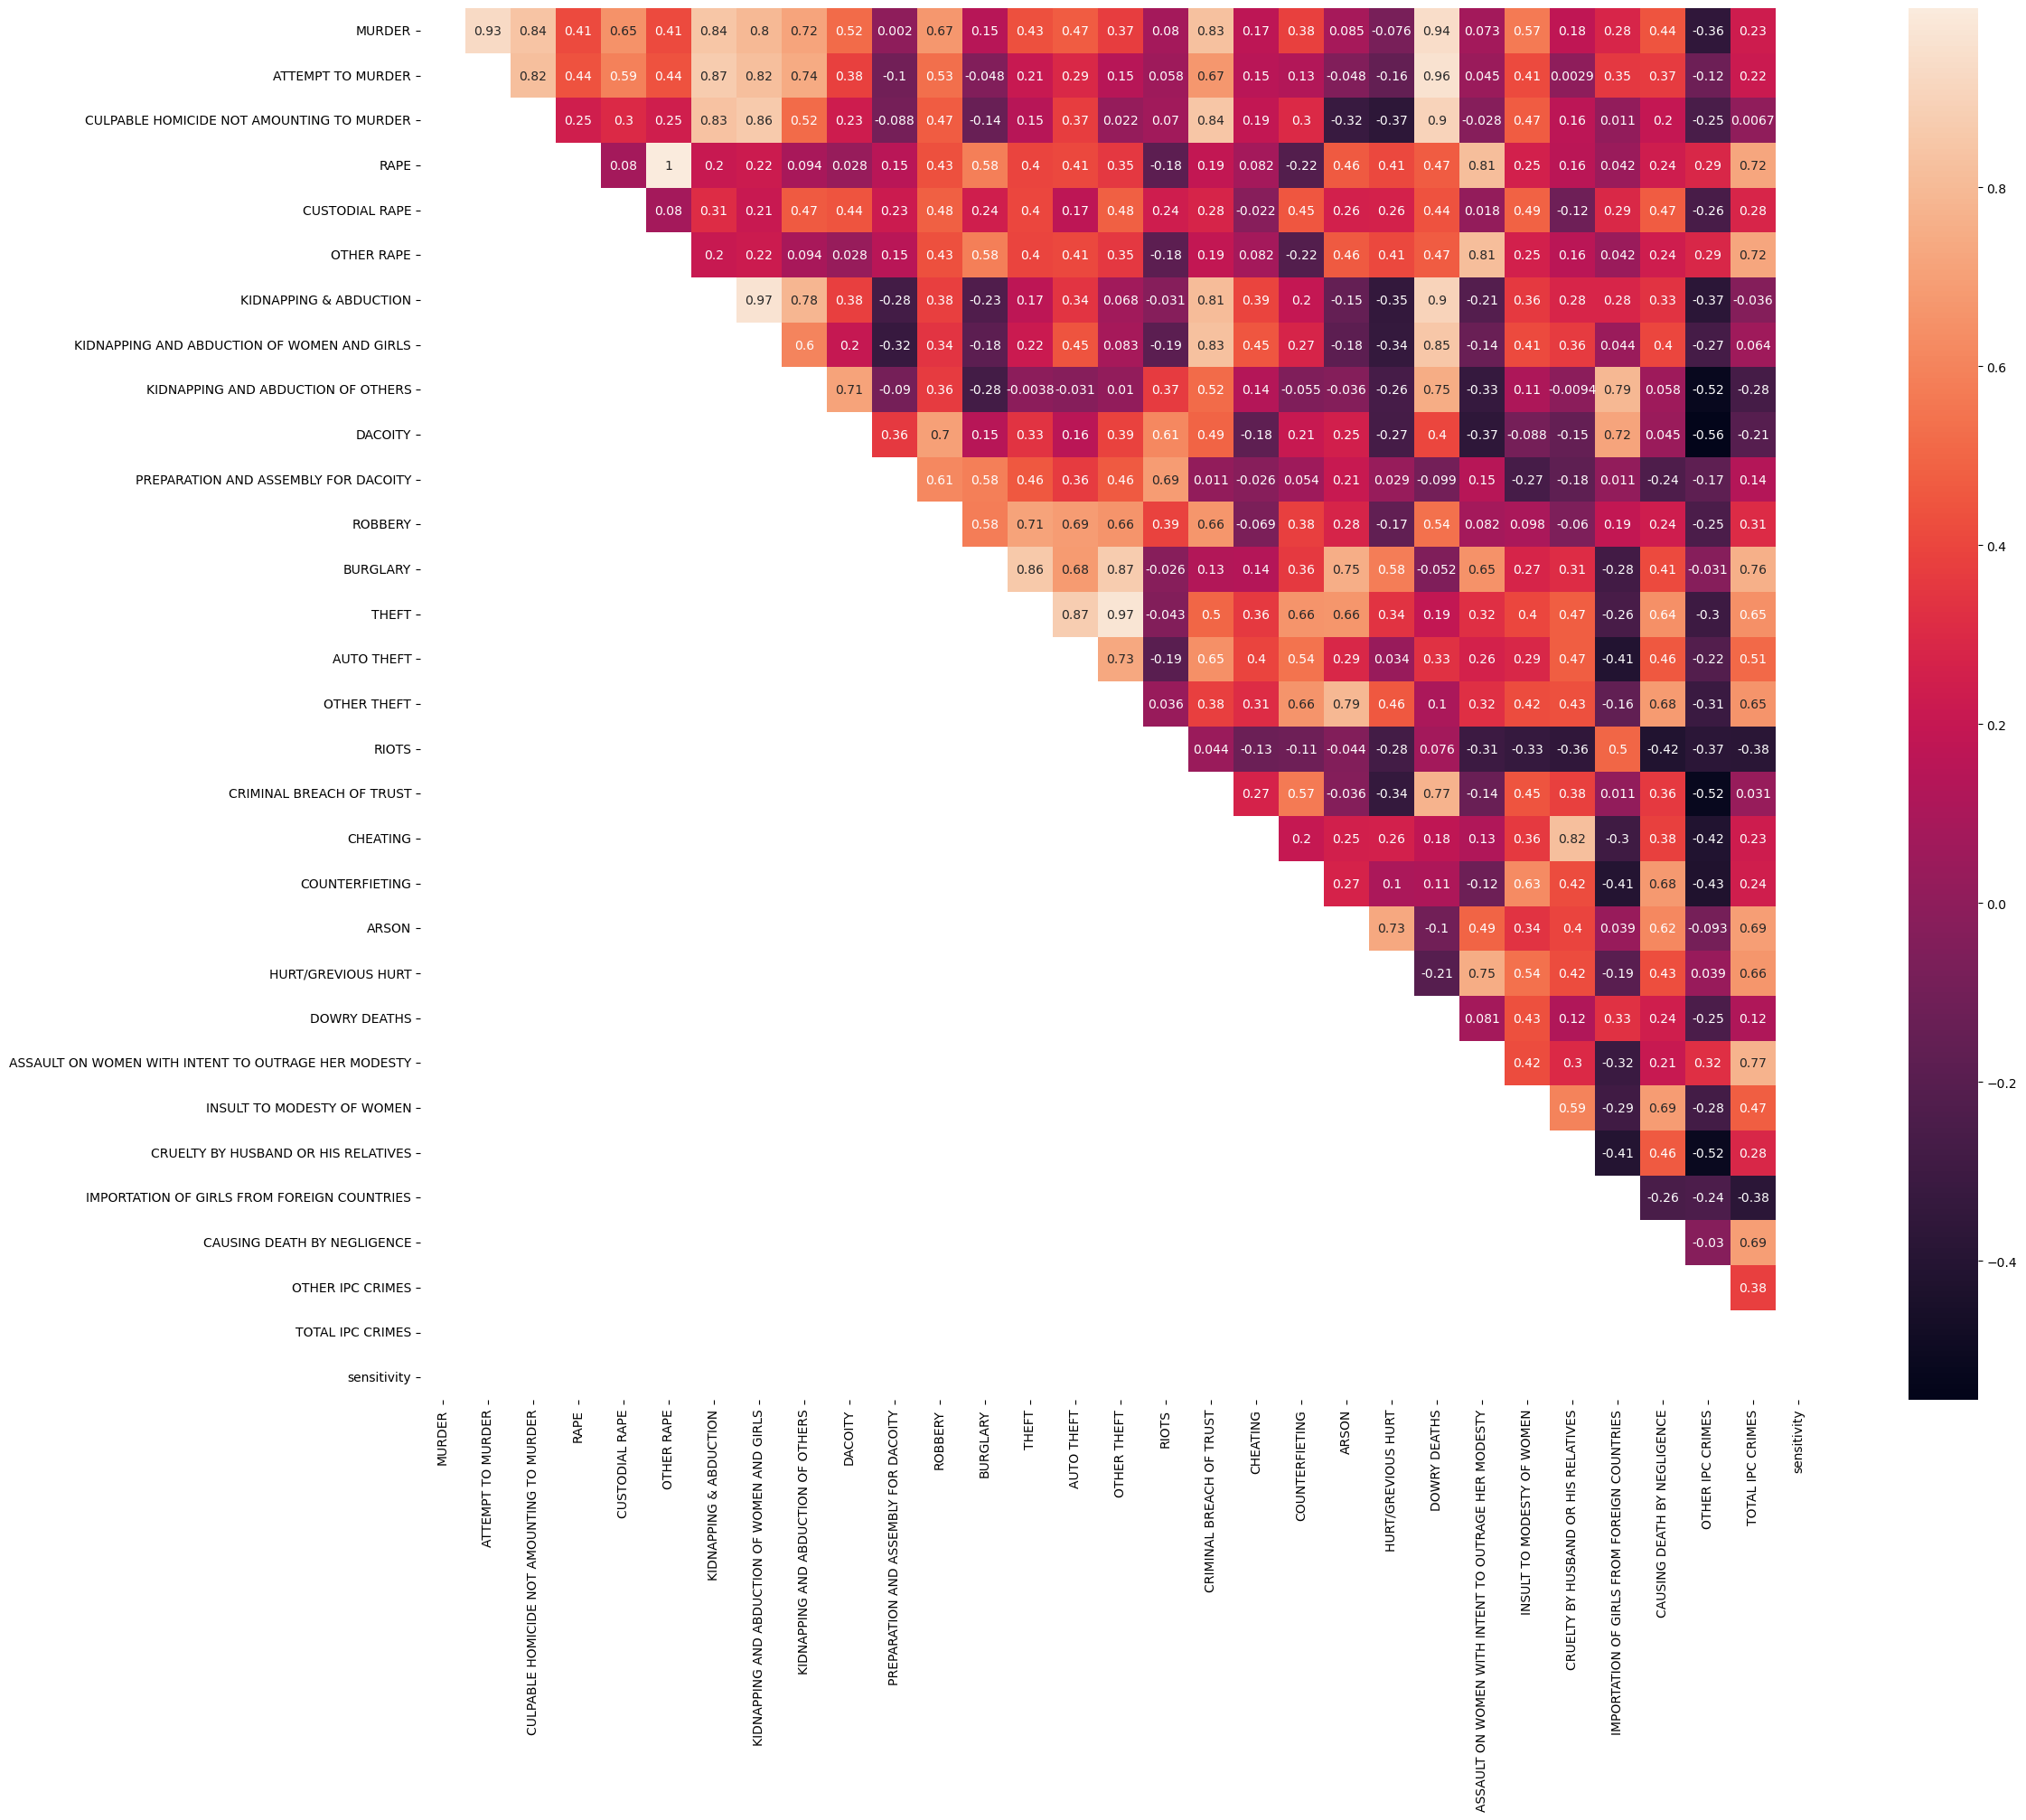

In [46]:
plt.figure(figsize=(25,20))
sns.heatmap(Sensitive_Areas.corr(),annot=True, mask=np.tril(Sensitive_Areas.corr()))

In [47]:
Sensitive_Areas.corr()

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,sensitivity
MURDER,1.000000,0.932278,0.838411,0.413393,0.649019,0.413331,0.844294,0.795823,0.715269,0.517122,...,-0.076342,0.939892,0.073133,0.565460,0.179101,0.279282,0.444701,-0.360674,0.232164,NaN
ATTEMPT TO MURDER,0.932278,1.000000,0.821620,0.437090,0.587247,0.437034,0.870671,0.819447,0.740731,0.381653,...,-0.158546,0.957485,0.045352,0.414404,0.002897,0.350155,0.365250,-0.120361,0.216348,NaN
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,0.838411,0.821620,1.000000,0.246124,0.298722,0.246096,0.832896,0.860529,0.515905,0.228826,...,-0.368658,0.898961,-0.028453,0.469206,0.164262,0.011248,0.196160,-0.252685,0.006677,NaN
RAPE,0.413393,0.437090,0.246124,1.000000,0.080453,1.000000,0.204501,0.224330,0.093870,0.028305,...,0.407378,0.468775,0.813716,0.253133,0.159069,0.041992,0.236435,0.285516,0.721107,NaN
CUSTODIAL RAPE,0.649019,0.587247,0.298722,0.080453,1.000000,0.080353,0.309854,0.211484,0.465117,0.441646,...,0.260670,0.435767,0.018410,0.485091,-0.116863,0.294820,0.466998,-0.258230,0.279976,NaN
OTHER RAPE,0.413331,0.437034,0.246096,1.000000,0.080353,1.000000,0.204472,0.224311,0.093824,0.028261,...,0.407355,0.468735,0.813721,0.253087,0.159082,0.041963,0.236390,0.285544,0.721085,NaN
KIDNAPPING & ABDUCTION,0.844294,0.870671,0.832896,0.204501,0.309854,0.204472,1.000000,0.968723,0.781473,0.375942,...,-0.345715,0.898996,-0.209517,0.357796,0.281536,0.280139,0.333674,-0.374030,-0.035669,NaN
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,0.795823,0.819447,0.860529,0.224330,0.211484,0.224311,0.968723,1.000000,0.602203,0.198262,...,-0.337463,0.853354,-0.135403,0.414950,0.363958,0.044118,0.403811,-0.272199,0.063785,NaN
KIDNAPPING AND ABDUCTION OF OTHERS,0.715269,0.740731,0.515905,0.093870,0.465117,0.093824,0.781473,0.602203,1.000000,0.710980,...,-0.263726,0.746604,-0.333607,0.107762,-0.009368,0.790341,0.058162,-0.518923,-0.275135,NaN
DACOITY,0.517122,0.381653,0.228826,0.028305,0.441646,0.028261,0.375942,0.198262,0.710980,1.000000,...,-0.270687,0.400091,-0.366060,-0.087547,-0.153943,0.715286,0.044789,-0.555247,-0.208938,NaN


Based on this, you can observe some highly correlated factors:

- MURDER and ATTEMPT TO MURDER: 0.932278
- RAPE and CUSTODIAL RAPE: 0.649019
- RAPE and ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY: 0.813716
- RAPE and INSULT TO MODESTY OF WOMEN: 0.565460
- TOTAL IPC CRIMES and RAPE: 0.721107


After analysis the above details we see that- 

- Most of the states in **peaceful areas** are from **northeast region and Union territories**. This may be due to low population and smaller area of the state.



- And the states in the **Sensitive areas**  are the states are one of the **biggest states of India in terms of area. They are also highly populated.**


- In **Moderate Areas** there is only one UT present which is Delhi (the capital of India) and only state from northeastern region Assam.



- **Various factors** can contribute to increased crime rates, such as drug abuse, the prevalence of gang culture, inadequate government law enforcement, low literacy rates, discrimination, human trafficking, and poor infrastructure. Gender inequality may be a significant factor contributing to the high occurrence of rape cases. 


- Conclusions regarding the safety levels of states in India:
  - **Most Unsafe State**: Madhya Pradesh emerges as the most unsafe state, reporting a total of 2,413,770 IPC crimes and 5,139,445 total crimes.
  - **Safest State**: On the other hand, Lakshadweep stands out as the safest state in India, recording only 743 IPC crimes and a total of 1,607 crimes.
  
- What could be dont to **reduce crimes?**
    - Reducing crime requires a multifaceted approach with a focus on several key aspects. Here are some strategies that can contribute to crime reduction:

     - Enhancing Literacy Rates: Elevating literacy rates is pivotal in diminishing crime levels within a state or country.

     - Promoting Civil Rights Awareness: Creating awareness about civil rights is crucial. Knowledge of one's rights empowers individuals to prevent wrongdoing.

     -  Strengthening Government Institutions: Robust government bodies are essential for taking effective actions and maintaining control over potential crises.

     - Addressing Gender Inequality: Tackling gender inequality is paramount, especially in reducing rape cases. The government should enact comprehensive legislation and schemes, coupled with public education initiatives.

     -  Employment Opportunities: Combatting unemployment is vital, as it can be a contributing factor to crime. Government initiatives and policies aimed at generating employment opportunities are crucial.

     -  Youth Engagement Programs: Implementing programs that engage and empower the youth, providing them with constructive outlets for their energy and talents, can deter involvement in criminal activities.

     - Substance Abuse Prevention: Initiatives focusing on preventing substance abuse can help mitigate crimes related to drug abuse and addiction.

     - Social Support Systems: Strengthening social support systems, including mental health services and rehabilitation programs, can address underlying issues that may lead to criminal behavior.

     - Technological Solutions: Leveraging technology for surveillance, crime mapping, and predictive policing can enhance law enforcement capabilities.

     - International Cooperation: Collaborating with international organizations and neighboring countries to address transnational crimes and share best practices in crime prevention.

     - Educational Reforms: Implementing educational reforms that emphasize values, ethics, and conflict resolution can contribute to creating a more law-abiding society.

     - Restorative Justice Programs: Introducing restorative justice programs that focus on rehabilitation and reconciliation rather than solely punitive measures.

# 4.4) Capstone project overall story in your own words. Min 1000 words.

Our capstone project tasked us with analyzing crime data in India, specifically focusing on states/union territories (UT) and districts. The dataset covered the period from 2001 to 2012, and Datatrained Academy provided us with 11 files to use for our analysis.

The data wes not enough so we were told to fetch more data from any source, be it manually or by doing webscrapping. The project was divided into 4 phases.

- **PHASE 1** was to collect the data and keep the collected data in a new file. The Data which we needed to collect was:-

1. The population of each state.

2. Literacy Rate in each state

3. Area of each state.


- During **PHASE 2** of the project, we were instructed to conduct a detailed analysis of the data at the STATE/UT level. Various analytical approaches were employed, such as investigating the relationship between Literacy Rate and Total Crimes, examining the correlation between the types of crimes and each state in conjunction with Literacy Rate, studying the year-on-year total crime rate, exploring the impact of area on overall crime, and delving into the relationship between population and overall crime. As the culmination of Phase 2, we thoroughly analyzed each state and compiled comprehensive crime reports based on the insights gained from the diverse sources of data we collected.


- In the subsequent phase, **PHASE 3** , our focus shifted to executing SQL operations. Specifically, we were tasked with crafting SQL queries to perform various operations on the 11 files supplied by the Datatrained Academy. The central objective of this phase involved the insertion of data into a designated table, followed by the extraction of information in accordance with specific requirements. To enhance our analytical capabilities, we not only stored relevant data in DataFrames but also engaged in visualization techniques towards the conclusion of this phase.

- **PHASE 4** of our project delved into the realm of clustering, employing unsupervised machine learning techniques. The primary objective was to categorize the data into distinct clusters representing peaceful, moderate, and sensitive areas based on their crime statistics. The initial step involved consolidating the data by state, followed by the application of the KMeans algorithm, resulting in the partitioning of the data into three segments: Cluster 0 (moderate), Cluster 1 (sensitive), and Cluster 2 (moderate).

- The classification criteria were established by evaluating the total crimes in each area. Peaceful areas were characterized by the lowest incidence of total crimes, while moderate areas exhibited an average level of total crimes. On the contrary, sensitive areas emerged as the most unsafe regions, characterized by a notably high occurrence of total crimes.

- Following the segmentation process, we meticulously constructed a dedicated dataframe for each cluster. Our in-depth analysis brought forth compelling insights, notably identifying **Madhya Pradesh as the most unsafe state and Lakshadweep as the safest state based on their respective total crime rates.**

 
- Upon conducting a meticulous analysis, we unearthed various **correlated factors** that shed light on how different states are grouped into their respective clusters. Our investigation delved into the factors influencing total IPC crimes, exploring the **impact of education levels, population, literacy rates, and the area of the state on their clustering. Our findings highlighted the distinct types and levels of crimes across different regions**, providing valuable insights into the complex dynamics of crime distribution.

- Additionally, we delved into **strategies and measures aimed at mitigating the crime rate** and overall incidence of criminal activities. Our discussions encompassed a diverse range of techniques and approaches that could be employed to address the complex issue of crime, exploring avenues for proactive intervention and fostering a safer societal environment.